In [28]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
X, y = mnist['data'], mnist['target']
X.shape
type(X)
list(X.iloc[0])
type(X)

pandas.core.frame.DataFrame

In [30]:
y.shape
y[0]

'5'

In [31]:
some_digit = X.iloc[0]
type(some_digit)

pandas.core.series.Series

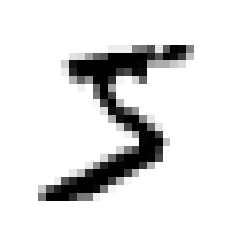

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = np.array(X[:1])
some_digit_image = some_digit.reshape((28,28))

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [33]:
y[0]
y = y.astype(np.uint8)
y[0]==5
#X[:0]

True

In [34]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
type(X[:0])
X[1:0]
#X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [35]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(len(X_train), len(y_train_5))

60000 60000


In [36]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [37]:
np.unique(y_train_5)

array([False,  True])

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [39]:
print(X[:1])

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  

[1 rows x 784 columns]


In [40]:
sgd_clf.predict(some_digit)

array([ True])

In [41]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [42]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype= bool)

In [43]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [45]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [47]:
y_train_perfect_prediction = y_train_5

confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [48]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_predict))
print(recall_score(y_train_5, y_train_predict))

0.8370879772350012
0.6511713705958311


In [49]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_predict)

0.7325171197343846

In [54]:
y_scores = sgd_clf.decision_function(some_digit)
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[2164.22030239]
[ True]


In [56]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [57]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5, method='decision_function')

In [60]:
print(y_scores, len(y_scores))

[  4411.53413566 -14087.12193543 -21565.51993633 ...   9394.4695853
  -2918.25117218  -9160.6081938 ] 60000


In [61]:
from sklearn.metrics import precision_recall_curve

prcissions, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [135]:
prcissions[8000]
print(threshold[:])
#threshold_location = 8000
len(threshold)
print(len(threshold)-1000)
print(threshold[len(threshold)-1])

[-71657.12621734 -71564.61915861 -71564.46030853 ...  28900.06013894
  31207.1376772   33370.36083388]
58922
33370.360833875304


In [176]:
def plot_precision_recall_vs_threshold(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "b--", label='precision',)
    plt.plot(threshold, recall[:-1], 'g--', label='recall')
    
    highlight_point = 57000
    index = np.argmax(precision >= 0.9)
    print(index)

    plt.title('Threshold')
    plt.grid(True)
    plt.axis([-50000,40000,0.0,1.0])
    plt.legend(frameon=False)
    plt.axhline(precision[index], color ="orange", linestyle ="--")
    plt.axhline(recall[index], color ="orange", linestyle ="--")
    plt.axvline(threshold[index], color ="orange", linestyle ="--")

55954


<function matplotlib.pyplot.show(close=None, block=None)>

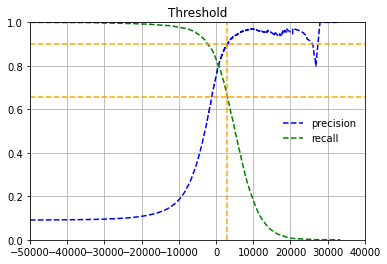

In [177]:
plot_precision_recall_vs_threshold(prcissions, recall, threshold)
plt.show

In [179]:
threshold_90_precision = threshold[np.argmax(prcissions >= 0.9)]
print(threshold_90_precision)
#threshold[threshold == threshold_90_precision]

y_train_pred_90 = (y_scores >= threshold_90_precision)

precission_sc = precision_score(y_train_5, y_train_pred_90)
recall_sc = recall_score(y_train_5, y_train_pred_90)

print(precission_sc, recall_sc)

3045.925822705364
0.9002016129032258 0.6589190186312488
